In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
import time

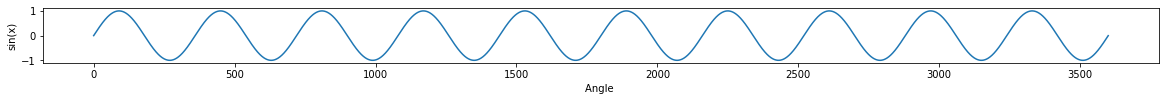

36000


In [33]:
#generate_data(sin function)

training_data = []
labels = []

for i in range(3600):
    for j in range(10):

        training_data.append(i+j/10)
        labels.append(math.sin( (i+j/10)*np.pi/180 )   )

plt.rcParams["figure.figsize"] = (20,1)    
plt.plot(training_data,labels)

plt.xlabel('Angle ')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()    
print(len(training_data))

In [34]:
#különböző lépésköznként felosztom az adatatokat azok átlagára
def prune(data,amount):
    
    X_avg = []
    y_avg = []
        
    for i in range(0,len(data),amount):
    
        avg = 0
        for j in range(amount):
            avg +=data[i+j]
            
        for j in range(amount):
            X_avg.append(i+j)
            y_avg.append(avg/amount)   
            
    return [X_avg,y_avg]

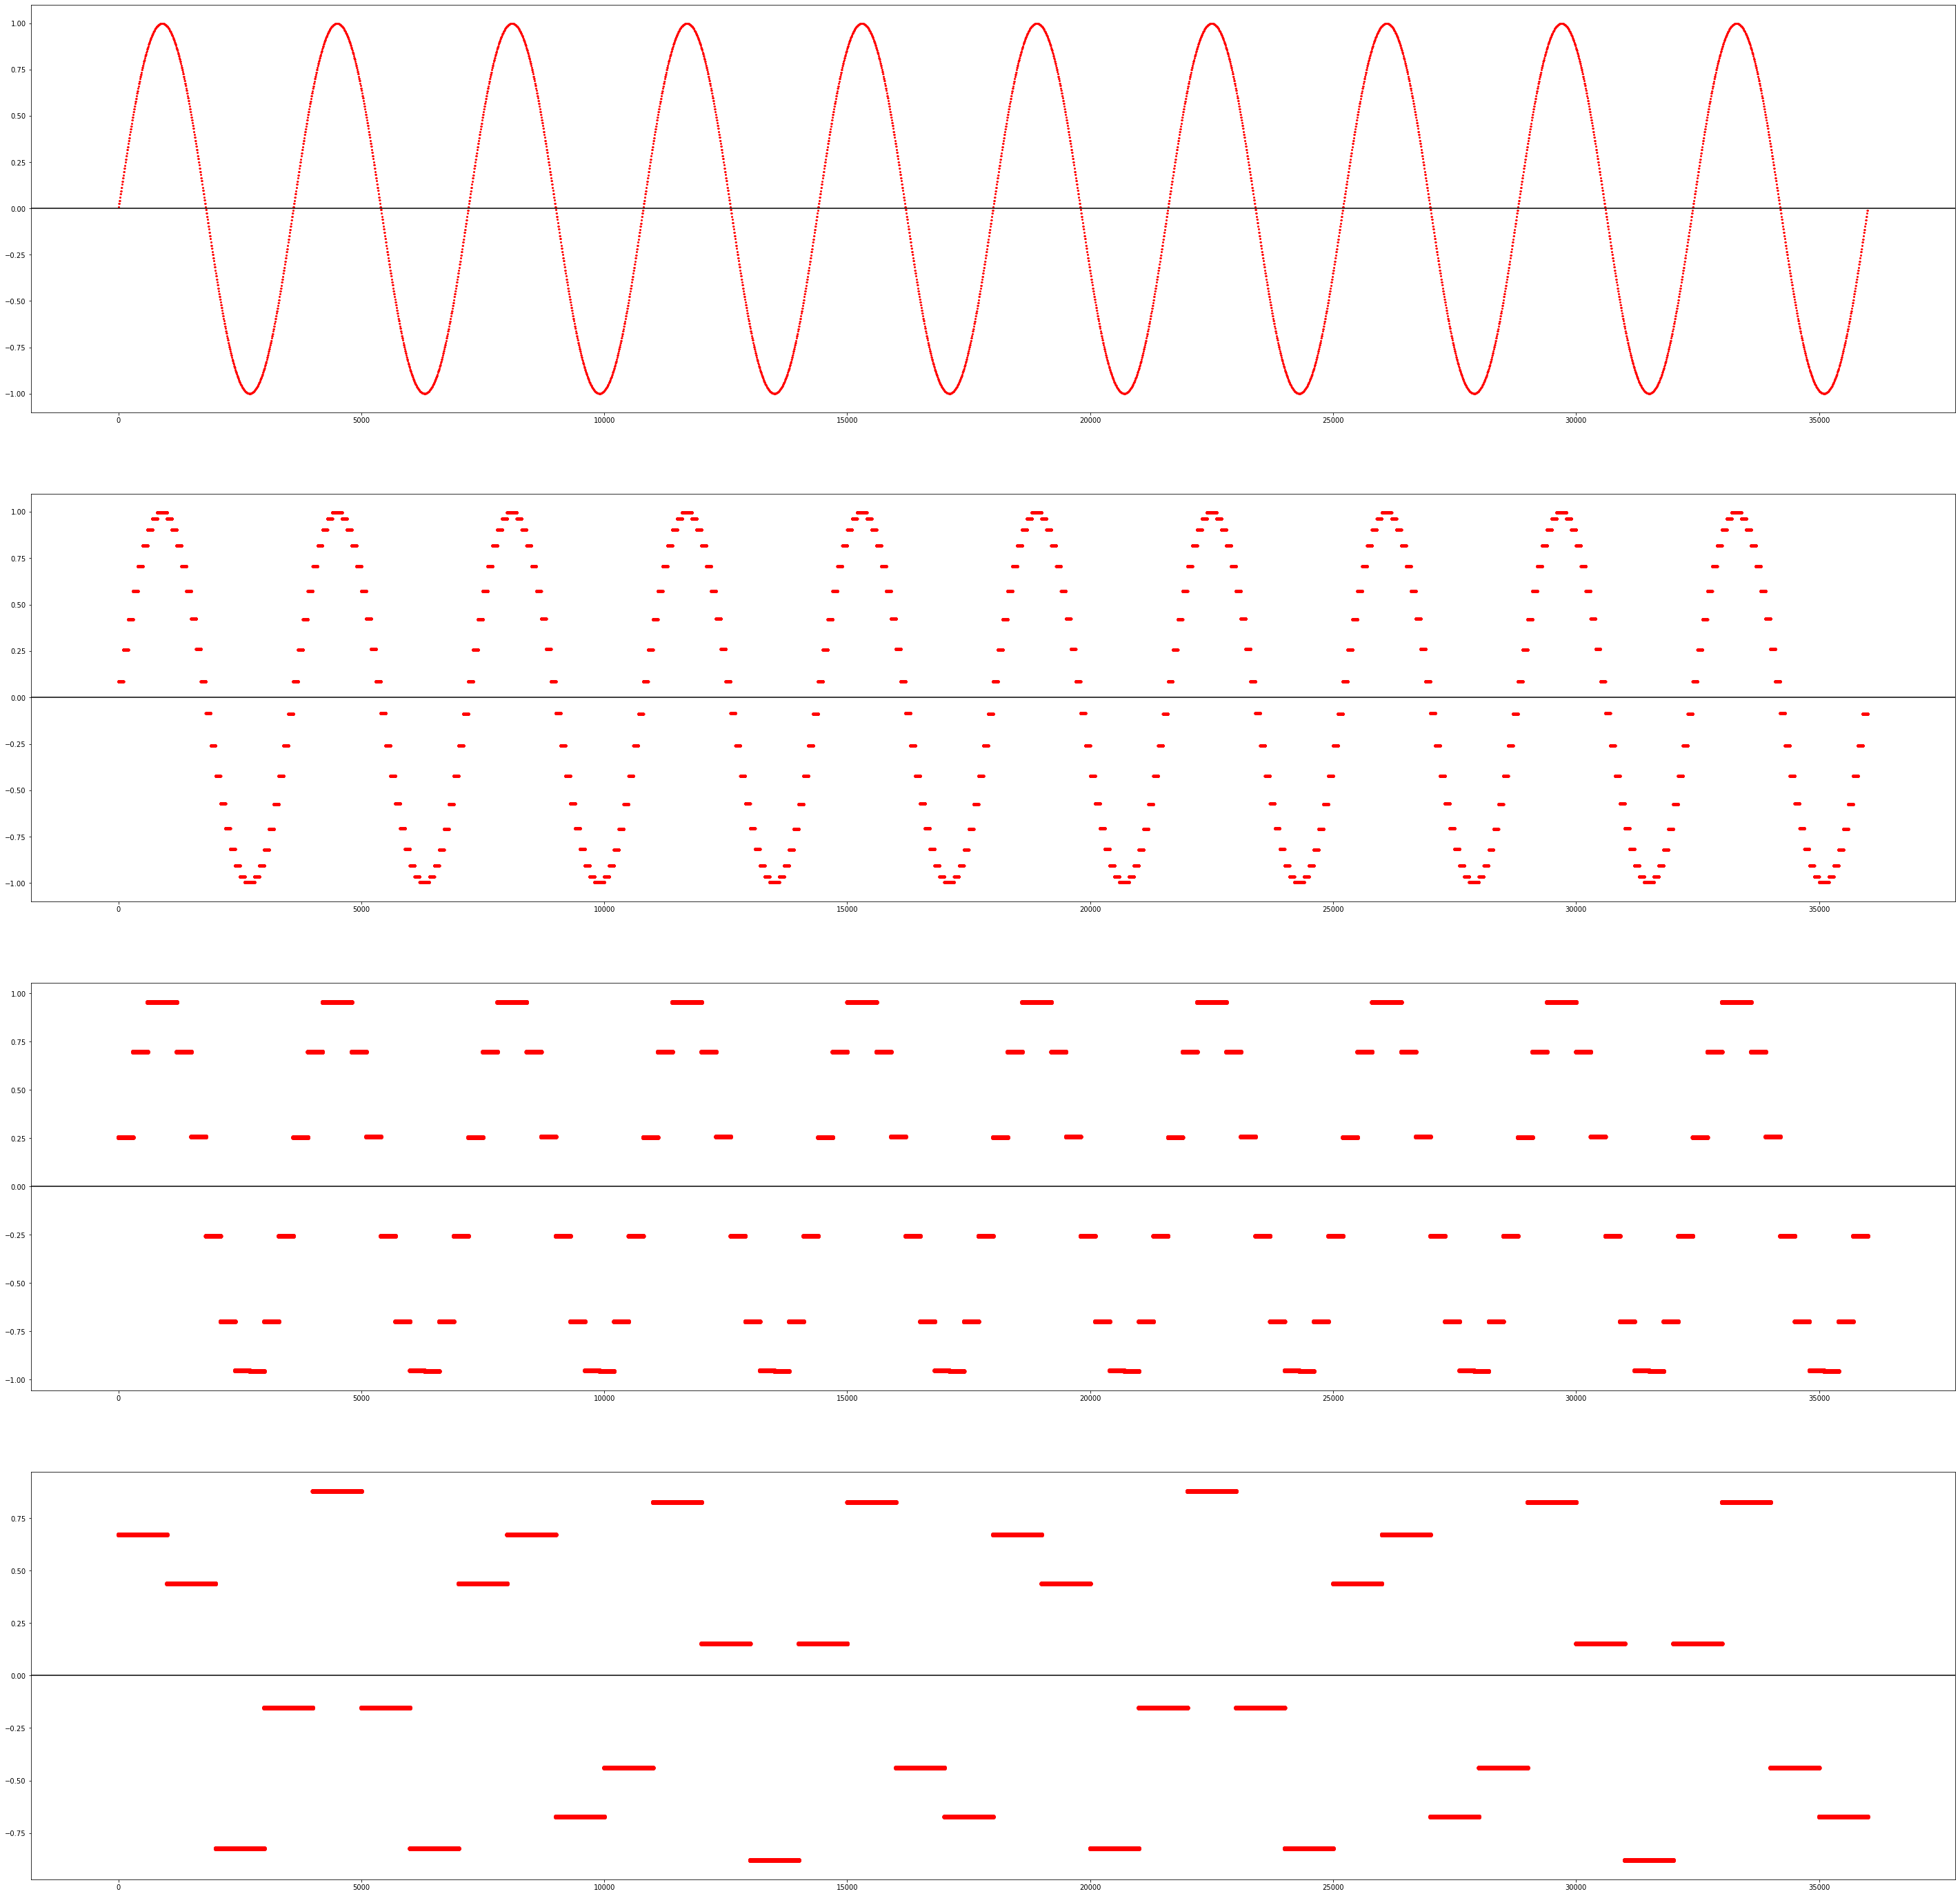

In [35]:
#Különböző felosztások
X_datasets = []
y_datasets = []

result = prune(labels,10)
X_datasets.append(result[0])
y_datasets.append(result[1])

result = prune(labels,100)
X_datasets.append(result[0])
y_datasets.append(result[1])


result = prune(labels,300)
X_datasets.append(result[0])
y_datasets.append(result[1])


result = prune(labels,1000)
X_datasets.append(result[0])
y_datasets.append(result[1])




figure ,axis = plt.subplots(4,1 , figsize=(50, 50))

axis[0].scatter(X_datasets[0],y_datasets[0],s=1,c='r')
axis[0].axhline(y=0, color='black', linestyle='-')



axis[1].scatter(X_datasets[1],y_datasets[1],s=10,c='r')
axis[1].axhline(y=0, color='black', linestyle='-')


axis[2].scatter(X_datasets[2],y_datasets[2],s=30,c='r')
axis[2].axhline(y=0, color='black', linestyle='-')


axis[3].scatter(X_datasets[3],y_datasets[3],s=30,c='r')
axis[3].axhline(y=0, color='black', linestyle='-')


plt.show()  

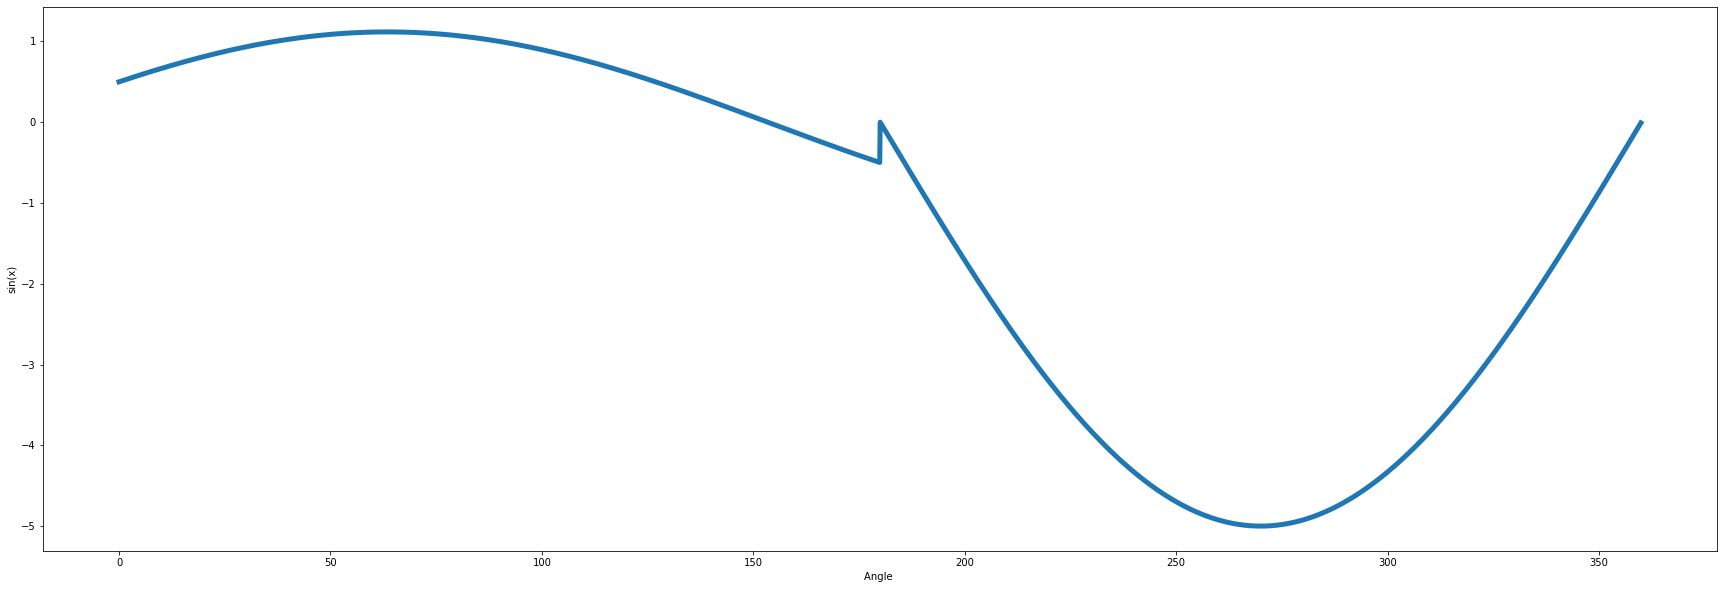

In [36]:
#generate_data + random

training_data = []
labels = []

for i in range(360):
    for j in range(10):

        training_data.append(i+j/10)
        if(i<180):
            labels.append(math.sin( (i+j/10)*np.pi/180 )+ math.cos((i+j/10)*np.pi/180)/2 )
        else:
            labels.append(math.sin( (i+j/10)*np.pi/180 )*5)

plt.rcParams["figure.figsize"] = (30,10)    
plt.plot(training_data,labels,linewidth=5)

plt.xlabel('Angle ')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()    

#Mi történik olyankor amikor az adathalmaz egy része lénygesen eltér a többitől? 
#A szinusz függvény ciklikus, így az adathalmaz végig hasonló lesz és  egy szabályt alkalmazva könnyedén feloszhatjuk.
#Viszont ha egy adathalmazban az értékek egyszer csak elkezdenek meredeken(jelentősen) növekedni/csökkeni a várthoz képest akkor,
#egy szabály alkalmazása esetén könnyen pontosságot veszíthetünk.

#Amennyiben az adathalmazunk folytonos, létrehozni minden lehetséges eredménynek külön kategóriát értelmetlen lenne.
#Egymáshoz közel lévő adatok esetén viszont érdemes lehet többet egy kategóriába tenni.
#De ha mindig ugyan annyi elemet teszunk egy kategóriába nem oldottunk meg semmilyen problémát. Valahogy el kell döntenünk,
#hogy mennyi egymáshoz közel álló adatot tegyünk egy kategóriába úgy hogy továbbra is pontosak legyünk.

#Erre alkalmas lehet MSE amely megmutatja az átlagtól való eltérésünket. Így az adatok felosztása során megbizonyosodhatunk
#arról hogy mennyire lesz pontos azok felosztását követően. 

#Éppen ezért érdemes lehet az itt ábrázolt adathalmazból eleinte több elemet felhasználni a leaf-ekhez és kevesebbet
#a második felében(és így több leaf-t létrehozzva) hogy pontosabb eredményt kapjunk.

#Ezt ki is próbálom a másik file-ban.



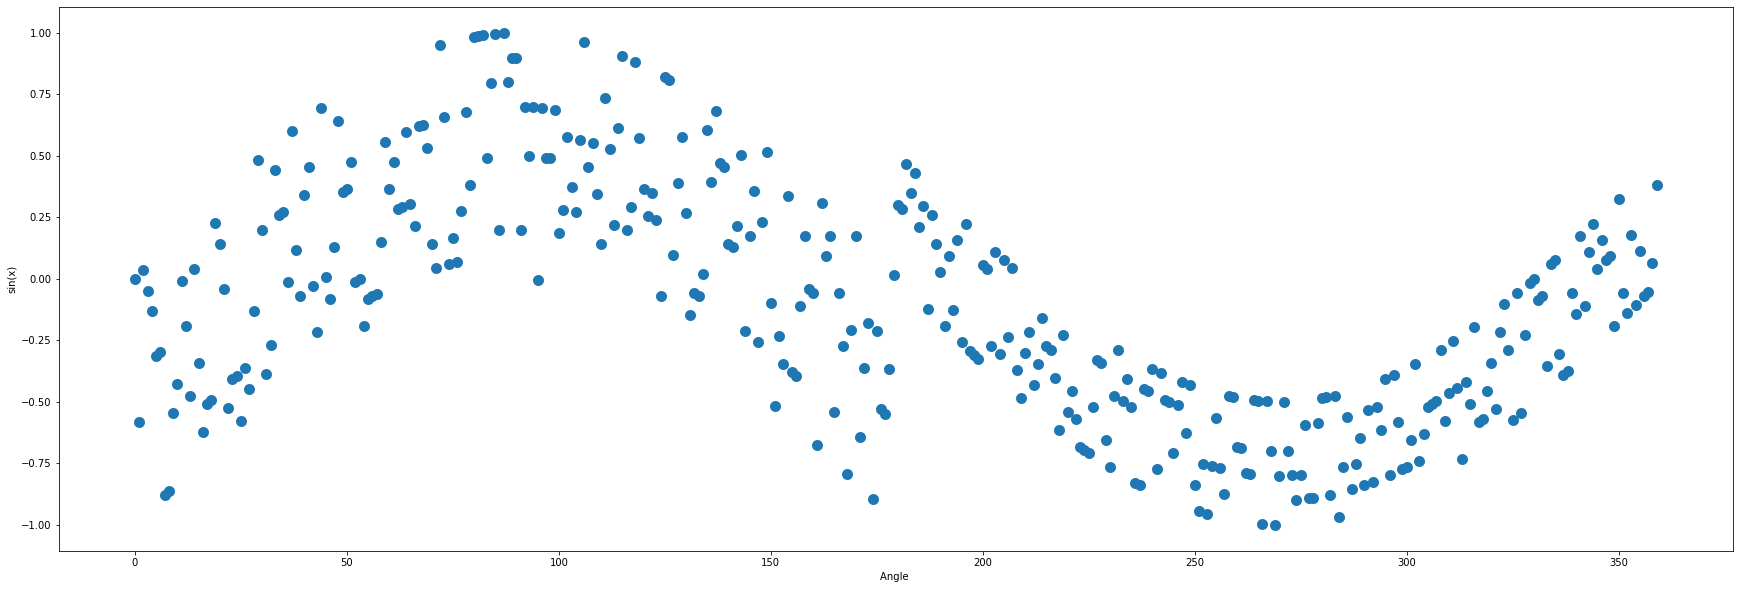

In [37]:
#generate_data + random

training_data = []
labels = []

for i in range(360):
    for j in range(1):#10

        training_data.append(i+j/10)
        
        if(i<180):
            labels.append(math.sin( (i+j/10)*np.pi/180 )+random.randint(-10,0)/10)
        else:
            labels.append(math.sin( (i+j/10)*np.pi/180 )+random.randint(0,5)/10)
#print(training_data)
plt.rcParams["figure.figsize"] = (30,10)    
plt.scatter(training_data,labels,linewidth=5)

plt.xlabel('Angle ')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()    

#Mi történik olyankor amikor több dimenziós az adatunk?

#Ilyenkor a végeredményt nem egy hanem több változó fogja befolyásolni,viszont ez nem jelenti azt hogy egymással arányosan fog
#ez megtörténni

#Például ha egy ház árát szeretnénk előre jelezni ott fontos a központól való távolság és a ház mérete.
#Nem csak arra vagyunk ilyenkor kiváncsiak hogy a méret vagy a távolság alalpján hogyan változik az ár(bár ez is fontos)
#hanem arra is hogy a kettő együttesen mit ad végeredményül.

#Ebből kifolyólag érdemes lehet külön választani a nagy házakat távolság szerint a közepeseket és a kissebeket is.
#De mivel nem szimplán három kategória lenne egyikől se így sok-sok kis régiót kapunk amiben jól körül van határolva
#hogy milyen paraméterek mely értéke vezete az adott eredményhez.
#Más szóval melyik változónak milyen értéke kell ahhoz hogy azt az eredményt adja.

#Itt az ábrán ezt szerettem volna ábrázolni hogy hiába ugyan azt a szinusz függvényt használjuk egy másik változo ráhatása miatt
#jelentősen megváltozik a végeredmény.
#A kettő közötti kapcsolat továbra is tisztán látható.



In [38]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0# len(self.nodes)
        self.currentsplit = 0
        self.feature_names = feature_names#coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.child = []
        self.leaf = 0
        

In [39]:
class Node:
    def __init__(self,labels,X_ids,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_names = feature_ids
        self.labels = labels
        self.child = []
        self.ids = X_ids
        self.leaf = 0 #true or false

In [40]:
def get_features(X,labels,column,ids):

    

    features = [ X[i] for i in ids ]
    features_categories = set(features)
    
    sub_labels = []
    for i in features_categories:
        
        sub_label = [labels[x] for x in range(len(features)) if features[x]==i]
        sub_index = [x for x in range(len(features)) if features[x]==i]
        sub_labels.append([sub_label,sub_index,i])
        
    return sub_labels

In [41]:
def calculate_entropy(data):

    categories = set(data)
    entropy = 0;
    
    for i in categories:
        p = data.count(i)/len(data)
        entropy -=  p*math.log(p,2)

    
    return entropy

In [42]:
def calculate_information_gain(X,labels,column,ids):
    I = 0
    
    sub_labels = get_features(X,labels,column,ids) 
    for i in sub_labels:
        entropy = calculate_entropy(i[0])
        I += entropy * len(i[0])
    
    I = I/len(labels)
    
    return I

In [43]:
def find_best_split(X,labels,feature_names,ids):
    
    largest_ig = 0
    split = 0
    I = 0 
    
    for i in feature_names:

            I = calculate_information_gain(X,labels,i,ids)
            if(I>largest_ig):
                largest_ig = I
                split = i

    return split

In [44]:
def build_tree(X,feature_names,labels,ids):
    
    split = 0 
    sub_nodes = []
    
    for i in range(len(feature_names)):

        split = find_best_split(X,labels,feature_names,ids)
    
    feature_names.pop(split)
    
    node_labels = get_features(X,labels,split,ids)    
        
    for i in node_labels:
        node = Node(i[0],i[1],feature_names)
        node.split = split
        node.split_result = i[2]

        if(feature_names == [] or calculate_entropy(node.labels) == 0):
            node.leaf = 1

        sub_nodes.append(node)

        
    if(feature_names == []):
        return sub_nodes
    else:
        for node in sub_nodes:
            if(node.leaf == 0):
                node.child = build_tree(X,node.feature_names,node.labels,node.ids)#nem ezek a parameterek kellenek?


    return sub_nodes

In [45]:
def fit(X,feature_names,labels):
    
    ids = [x for x in range(len(X))]
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    tree.child = build_tree(X,feature_ids,labels,ids)
    return tree

In [46]:
forest = []
for i in range(len(X_datasets)):
    start = time.time()
    tree = fit(X_datasets[i],["Angle"],y_datasets[i])
    end = time.time()
    print("%d execution time: %f" %(i,start-end))
    forest.append(tree)

0 execution time: -447.732603
1 execution time: -437.219814
2 execution time: -410.177118
3 execution time: -437.028367


In [47]:
def predict(node,features):
    
    for i in range(len(features)):
        if(node.leaf == 1):
            return set(node.labels)
        else:
            for j in node.child:
                
                    if(features[j.split] == j.split_result):
                        if(j.leaf == 1):
                            return set(j.labels)
                        else:
                            return set(predict(j,features))
            
          

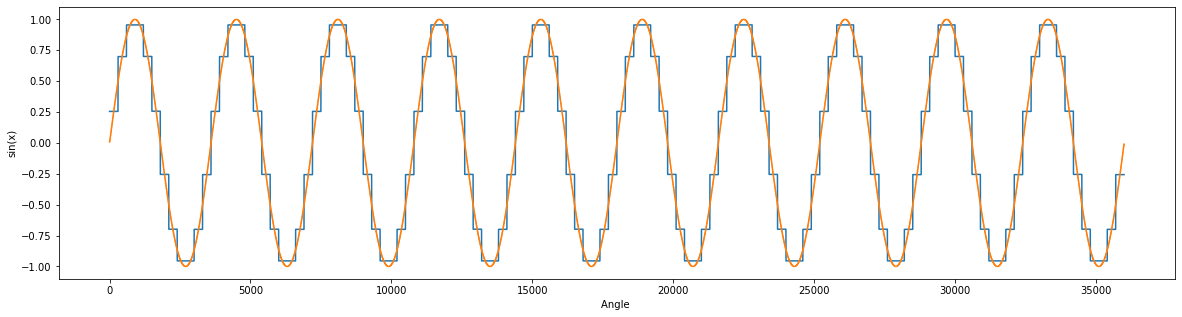

In [52]:
#Itt látható hogy mekkora a különbség ha felosztjuk az adatokat különböző mértékben

plt.rcParams["figure.figsize"] = (20,5)    
plt.plot(forest[2].X,forest[2].labels)
plt.plot(X_datasets[0],y_datasets[0])
plt.xlabel('Angle ')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()    
